In [1]:
# Scrape latest stats for PGA tour players
import requests, csv, datetime, os
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
# Scraping variables
season = '2023'
stat_links = ['https://www.pgatour.com/content/pgatour/stats/stat.120.y'+season+'.html','https://www.pgatour.com/content/pgatour/stats/stat.101.y'+season+'.html',
              'https://www.pgatour.com/content/pgatour/stats/stat.102.y'+season+'.html','https://www.pgatour.com/content/pgatour/stats/stat.103.y'+season+'.html',
              'https://www.pgatour.com/content/pgatour/stats/stat.02674.y'+season+'.html','https://www.pgatour.com/content/pgatour/stats/stat.02675.y'+season+'.html',
              'https://www.pgatour.com/content/pgatour/stats/stat.02564.y'+season+'.html','https://www.pgatour.com/content/pgatour/stats/stat.130.y'+season+'.html',
              'https://www.pgatour.com/content/pgatour/stats/stat.02567.y'+season+'.html','https://www.pgatour.com/content/pgatour/stats/stat.02568.y'+season+'.html',
              'https://www.pgatour.com/content/pgatour/stats/stat.02569.y'+season+'.html']
stats_hd = []

In [3]:
# Parse links
for i in range(len(stat_links)):
  print(f'{i+1}) Parsing details - ({stat_links[i]})')
  stat_response = requests.get(stat_links[i])
  soup = BeautifulSoup(stat_response.text, 'html.parser')
  stats_hd.append(soup.title.string.split('|')[0].strip().lower())
  table = soup.find_all('table',{'id':'statsTable'})
  print(soup.title.string)
  
  # Get headers
  headers = table[0].find_all('thead')[0].find_all('th')
  tmp_hd, tmp_lst = [],[]
  for j in range(len(headers)): 
    #print(headers[j].get_text().strip().lower())
    tmp_hd.append(headers[j].get_text().strip().lower().replace('\xa0', ' '))
    tmp_lst.append([])
  r_inds = [x for x in range(len(tmp_hd)) if 'rank' in tmp_hd[x]]
  
  # Get data
  data = table[0].find_all('tbody')[0].find_all('tr')
  for j in range(len(data)):
    row = data[j].find_all('td')
    for k in range(len(row)):
      item = row[k].get_text().strip().lower()
      if k in r_inds:
        try:
          if item[0]=='t': tmp_lst[k].append(item[1:])
          else: tmp_lst[k].append(item)
        except IndexError: tmp_lst[k].append(item)
      else: tmp_lst[k].append(item)
  
  # Store data in dataframe
  pl_col = tmp_hd.index('player name')
  if i==0:  # create new df
    df = pd.DataFrame({'player name': tmp_lst[pl_col]}) 
    for j in range(len(tmp_hd)):
      if j==pl_col: continue
      else: df[stats_hd[i]+'| '+tmp_hd[j]] = tmp_lst[j]
  else:     # update existing df
    new_pl = list(set(tmp_lst[pl_col]) - set(list(df['player name'])))
    for pl in new_pl: 
      df = df.append(pd.Series(dtype='float64'), ignore_index=True) #player does not exist(add new row to df)
      df.loc[len(df)-1, 'player name'] = pl
    for j in range(len(tmp_hd)):
      if j==pl_col: continue
      else: 
        df[stats_hd[i]+'| '+tmp_hd[j]] = [None]*len(df)
        for k in range(len(tmp_lst[pl_col])):
          pl = tmp_lst[pl_col][k]
          df_i = df.index[df['player name']==pl][0]
          df.loc[df_i, stats_hd[i]+'| '+tmp_hd[j]] = tmp_lst[j][k]
  print()
# Output data to csv file
df.to_csv(str(datetime.datetime.now().year)+'_'+str(datetime.datetime.now().month)+'_'+str(datetime.datetime.now().day)+' PGA Tour Stats.csv', index=False)

1) Parsing details - (https://www.pgatour.com/content/pgatour/stats/stat.120.y2023.html)
Scoring Average | PGA TOUR Stats

2) Parsing details - (https://www.pgatour.com/content/pgatour/stats/stat.101.y2023.html)
Driving Distance | PGA TOUR Stats

3) Parsing details - (https://www.pgatour.com/content/pgatour/stats/stat.102.y2023.html)
Driving Accuracy Percentage | PGA TOUR Stats

4) Parsing details - (https://www.pgatour.com/content/pgatour/stats/stat.103.y2023.html)
Greens in Regulation Percentage | PGA TOUR Stats

5) Parsing details - (https://www.pgatour.com/content/pgatour/stats/stat.02674.y2023.html)
SG: Tee-to-Green | PGA TOUR Stats

6) Parsing details - (https://www.pgatour.com/content/pgatour/stats/stat.02675.y2023.html)
SG: Total | PGA TOUR Stats

7) Parsing details - (https://www.pgatour.com/content/pgatour/stats/stat.02564.y2023.html)
SG: Putting | PGA TOUR Stats

8) Parsing details - (https://www.pgatour.com/content/pgatour/stats/stat.130.y2023.html)
Scrambling | PGA TOUR St

**To locate and download file click on the 'Files' icon in colab and then download the 'PGA Tour Stats' csv**

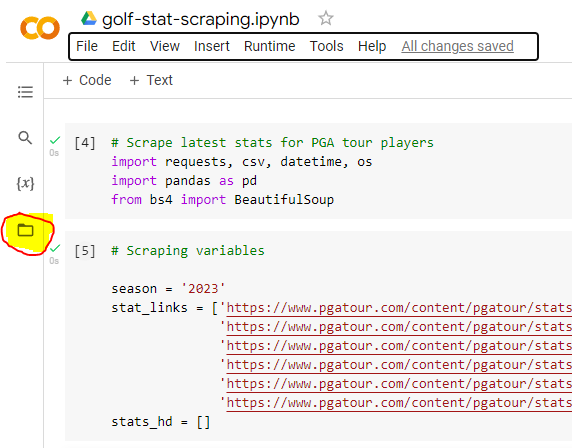

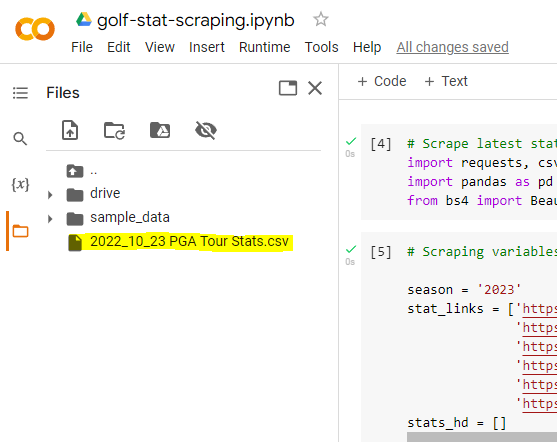